# Problem Set 1, due Apr 11th 1:30pm (start of the class)
## Before You Start

Please save this notebook as
`LASTNAME_FIRSTNAME-PS1.ipynb`. Then edit your renamed file directly in
your browser (or emacs if you can ;-) by typing: ``` ipython notebook <name_of_downloaded_file>

Please submit
* this notebook (as .ipynb)
* html or pdf 'final version' of it


## Collaboration

Working together is useful and fun.  However,

* please list all your collaborators' names below here and
* submit your own work.  Copy-pasting is not ok.

collaborators:

* ...

## Readings:

This problem set assumes you can work with pandas.  Consult McKinney
Ch 3 and in particular 5.  Matplotlib is briefly discussed in McKinney Ch 8.


In [5]:
# Let's import the important packages.  Depending on how do your
# exactly proceed, you may need more.  

# Numpy is a library for working with Arrays
import numpy as np
print("Numpy version:        %6.6s" % np.__version__)

# SciPy implements many different numerical algorithms
import scipy as sp
print("SciPy version:        %6.6s" % sp.__version__)

# Pandas makes working with data tables easier
import pandas as pd
print("Pandas version:       %6.6s" % pd.__version__)

# Module for plotting
import matplotlib 
print("Maplotlib version:    %6.6s" % matplotlib.__version__)
%matplotlib inline
# needed for inline plots in notebooks
import matplotlib.pyplot as plt  

# SciKit Learn implements several Machine Learning algorithms
import sklearn
print("Scikit-Learn version: %6.6s" % sklearn.__version__)

Numpy version:        1.13.1
SciPy version:        0.19.1
Pandas version:       0.20.3
Maplotlib version:     2.0.2
Scikit-Learn version: 0.19.0


---

## Introduction to the assignment

For this assignment, you will be using the [Boston Housing Prices Data
Set](http://archive.ics.uci.edu/ml/datasets/Housing).  Please read
about the dataset carefully before continuing -- it is worth investing
a few minutes up front otherwise you are likely to be hopelessly
confused! 



In [6]:
from sklearn.datasets import load_boston
bdata = load_boston()

The following commands will provide some basic information about the shape of the data:

In [7]:
print(bdata.keys())
print(bdata.feature_names)
print(bdata.data.shape)
print(bdata.target.shape)

# uncomment the following if you want to see a lengthy description of the dataset
print(bdata.DESCR)

dict_keys(['data', 'target', 'feature_names', 'DESCR'])
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
(506, 13)
(506,)
Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD 

In [8]:
boston = pd.DataFrame(bdata.data)

In [9]:
boston.columns = bdata.feature_names[:]
print(boston.shape)

(506, 13)


---

## Part 1: Descriptive analysis

### 1.1: Explore the data

Let's dig into the data a bit to see what we're dealing with. The first thing to do is to make sure you understand how the data is organized, what the data types are, whether there is any missing data, and so forth. Get your bearings on your own, then answer the following questions.

 - 1.1.1: How many different variables are there in the dataset, and how many different observations?
 - 1.1.2: How many instances are classified as neighborhoods where the tract bounds the Charles River? 
 - 1.1.3: Show that dataset does not contain any missing values.
 - 1.1.4: Display the property tax rate in the 5 neighborhoods that have the highest median housing price.

In [11]:
print("shape " + str(boston.shape))
print("size " + str(boston.size))

print(boston[boston.CHAS == 1].shape)

print(pd.DataFrame.notnull(boston).size)


boston['MEDV'] = bdata.target
print(boston.sort_values('MEDV', ascending=False).loc[:, ['TAX']].head(5))

shape (506, 13)
size 6578
(35, 13)
6578
       TAX
283  198.0
225  307.0
369  666.0
370  666.0
371  666.0


*Provide our answers below:*

 - 1.1.1: 13 variables and 6578 observations
 - 1.1.2: 35 instances where Neighborhoods bound by Charles
 - 1.1.3: zero missing values because zero items isnull
 - 1.1.4: 198, 307, 666, 666, 666 (x10,000) is the tax rates for the 5 highest median houseing price neighborhoods.

### 1.2: Answer some basic questions
 - 1.2.1: What is the median housing price in Boston's most expensive neighborhood?
 - 1.2.2: How many neighborhoods have, on average, less than 5 rooms per dwelling?
 - 1.2.3: What is the property tax rate in the most expensive neighborhood that is also adjacent to the Charles River?
 - 1.2.4: What is the crime rate in the neighborhood with the highest median housing price? 
 - 1.2.5: What is the crime rate in the neighborhood with the lowest median housing price?

In [12]:
print(boston.sort_values('MEDV', ascending=False).loc[:, ['MEDV']].head(1))
print(len(boston.loc[boston['RM'] < 5]))
print(boston.loc[boston['CHAS'] == 1].sort_values('MEDV', ascending=False).loc[:, ['TAX']].head(1))
print(boston.sort_values('MEDV', ascending=False).loc[:, ['CRIM']].head(1))
print(boston.sort_values('MEDV', ascending=True).loc[:, ['CRIM']].head(1))

     MEDV
283  50.0
15
       TAX
372  666.0
        CRIM
283  0.01501
        CRIM
398  38.3518


*Provide our answers below:*

 - 1.2.1: 50 (x10,000) is the medean house price in most expensive neighborhood.
 - 1.2.2: 15 neighborhoods
 - 1.2.3: 666 (x10,000) is the property tax in the most expensive neighborhoodalso adjacent to the Charles River
 - 1.2.4: 0.01501 per capita crime rate in highest median housing price
 - 1.2.5: 38.03518 per capita crime rate in lowest median housing price

### 1.3: Summary statistics

Create a clean, organized table that shows just the following
information (no more, no less) for each variable in the dataset.  Your
table should have K rows (one for each variable) and 7
columns, ordered as below:

- The name of the variable
- The number of observations with non-missing values
- The mean of the variable
- The standard deviation of the variable
- The minimum value of the variable
- The median of the variable
- The maximum value of the variable

In [13]:
observations = boston.notnull().sum()
means = boston.mean()
stds = boston.std(axis=0)
mins = boston.min()
medians = boston.median()
maxes = boston.max()

sumStats = pd.concat([observations, means, stds, mins, medians, maxes], axis=1).reset_index()
sumStats.columns = ['Name', 'Non_Null_Observations', 'Mean', 'Std', 'Min', 'Median', 'Max']
sumStats

,Name,Non_Null_Observations,Mean,Std,Min,Median,Max
0,CRIM,506,3.593761,8.596783,0.00632,0.25651,88.9762
1,ZN,506,11.363636,23.322453,0.00000,0.00000,100.0000
2,INDUS,506,11.136779,6.860353,0.46000,9.69000,27.7400
3,CHAS,506,0.069170,0.253994,0.00000,0.00000,1.0000
4,NOX,506,0.554695,0.115878,0.38500,0.53800,0.8710
5,RM,506,6.284634,0.702617,3.56100,6.20850,8.7800
6,AGE,506,68.574901,28.148861,2.90000,77.50000,100.0000
7,DIS,506,3.795043,2.105710,1.12960,3.20745,12.1265
8,RAD,506,9.549407,8.707259,1.00000,5.00000,24.0000
9,TAX,506,408.237154,168.537116,187.00000,330.00000,711.0000


### 1.4 Simple statistical test

Using a t-test, compare the median house value in locations that are
adjacent to the Charles River to locations that are not adjacent to
the Charles River. Do you reject the null hypothesis that prices are
equivalent?

In [14]:
nearChas = boston.loc[boston['CHAS'] == 1].loc[:, ['MEDV']]
notNearChas = boston.loc[boston['CHAS'] != 1].loc[:, ['MEDV']]
sp.stats.ttest_ind(nearChas,notNearChas)

Ttest_indResult(statistic=array([ 3.99643747]), pvalue=array([  7.39062317e-05]))

*Write your response here.*

## Part 2: Histograms and Scatterplots


### 2.1: Histogram of housing prices

Below you will find some very basic code to make a very basic
histogram of median housing prices (the "target" variable) for your
dataset.  Your first task is to make this graph look pretty by doing
the following:

1. Add appropriate labels to the x and y axes, make sure to include units
2. Change the bin width on the histogram to be $1000
3. Remove the axes on the top and right side of the plot window
4. Change the color of the bars to be green, and remove the black borders from the bars


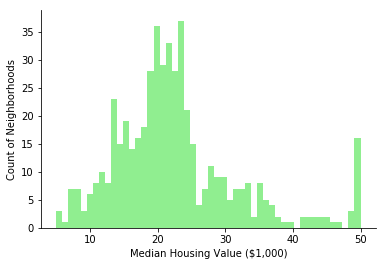

In [15]:
# edit the code below to make the graph look good
#plt.hist(bdata.target)
n, bins, patches = plt.hist(bdata.target, 50, color='lightgreen', lw=0)

plt.xlabel('Median Housing Value ($1,000)')
plt.ylabel('Count of Neighborhoods')

ax = plt.subplot()
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

plt.show()


### 2.2: Scatter plot of housing prices and crime

Use matplotlib to create a scatter plot that shows the relationship
between the median value of the home (y-axis) and the per-capita crime
rate (x-axis).  Properly label your axes, and make sure that your
graphic looks polished and professional.


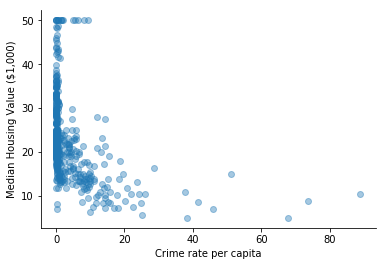

Correlation Coefficient: -0.385831689884


In [16]:
plt.scatter(boston['CRIM'], boston['MEDV'], alpha=0.4)

plt.ylabel('Median Housing Value ($1,000)')
plt.xlabel('Crime rate per capita')

ax = plt.subplot()
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

plt.show()
r = np.corrcoef(boston['MEDV'], boston['CRIM'])
print('Correlation Coefficient: ' + str(r[0,1]))


### 2.3: Interpret

What do you observe in the above scatter plot? Does there appear to be
a relationship between crime rates and housing prices in Boston?
Calculate the correlation between these two variables. Do you think
this relationship is causal, or just a correlation? Justify your
position.

Looking at the scatter plot, it looks like the pattern is decreasing in a negative direction. After calculating the correlation coefficient -0.3858 this indicates a negative correlation between per-capita crime rate and median value of owner-occupied homes. However, the correlation coefficient is neither close to 1 or -1 but closest to 0. The value 0 indicates no correlation, but because the value is negative, this relationship is considered to be a slightly negative correlation and not at all a strong negative correlation.

This relationship is correlational, especially with a low correlation value. However because the value is closest to 0 (no correlation) rather than -1, the slight negative correlation may be influenced by unaccounted confounding variables affecting the results. There is no evidence to suggest causality. It is likely that areas with higher median housing value are richer areas with lower crime rates due to characteristics of the people who choose to live in a more expensive area of housing. Conversely, lower cost areas may have lower-income populations that are more prone to crime.

### 2.4 Correlation Matrix

Calculate the correlation of every pair of variables in the
dataset. Create a *K* x *K* matrix where the value in the (*i*,*j*)
cell is the correlation between the *i*th and *j*th variable. Show off
your skills by coloring the cell so that large positive correlations
appear green and large negative correlations appear red (use a
gradient to make this pretty). What two variables appear to me most
positively and negatively correlated?

(array([  0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,
          9.5,  10.5,  11.5,  12.5,  13.5]),
 <a list of 14 Text xticklabel objects>)

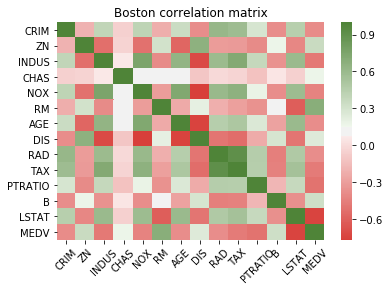

In [17]:
import seaborn as sns

# Choosing the red and green color gradient
cmap = sns.diverging_palette(373, 120, as_cmap=True)
plt.title("Boston correlation matrix")

corr = boston.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap=cmap)
plt.xticks(rotation=45)

Looking at the correlation matrix, the variables most positively correlated are property tax rate per ten thousand dollars and index of accessibility to radial highways (RAD). These are the darkest green boxes. The variables most negatively correlated are proportion of non-retail business acres per town (INDUS) and weighted distances to five Boston employment centres (DIS), DIS and nitric oxides concentration (NOX), proportion of owner-occupied units built (AGE) and DIS, and percent lower status of the population and median value of owner-occupied homes in thousands (MEDV). These are indicated by the darker red squares.

### 2.5 Create your own (creative and effective) visualization

Use another type of graph or chart to illustrate an interesting
pattern in the data.  Be creative in your visualization, and make sure
to produce a "publication-quality" graph.  Points will be given for
useful and creative graphs; points will be deducted for confusing
issues like unlabeled axes.  If you're new to data visualization,
[this guide](http://pubs.aeaweb.org/doi/pdfplus/10.1257/jep.28.1.209)
is a good place to start.

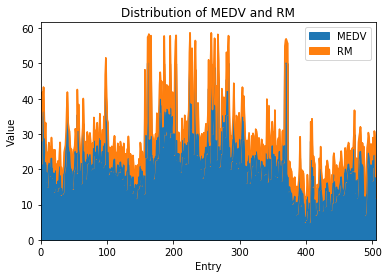

In [22]:
# stacked area chart
df = pd.DataFrame(boston, columns=['MEDV', 'RM'])
df.plot.area();

plt.xlabel("Entry")
plt.ylabel('Value')
plt.title('Distribution of MEDV and RM')